<h3>Simulación matemática 2018 </h3>
<div style="background-color:#0099cc;"> 
    <font color = white>
<ul>
  <li>Lázaro Alonso </li>
  <li>Email:   `alonsosilva@iteso.mx, lazarus.alon@gmail.com`</li>
</ul>
    </font>
</div>

# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

##  Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(0,1)$ y $(1,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(-1,1)$, $(0,0)$ y $(1,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_1(1) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 0 \\ 1 & 1\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-\beta_1=1$.

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [87]:
P1 = [0, 1]
P2 = [1, 0]

X = np.array([[1, 0], [1, 1]])
y = np.array([1, 0])
b0, b1 = np.linalg.inv(X).dot(y)
b0, b1

(1.0, -1.0)

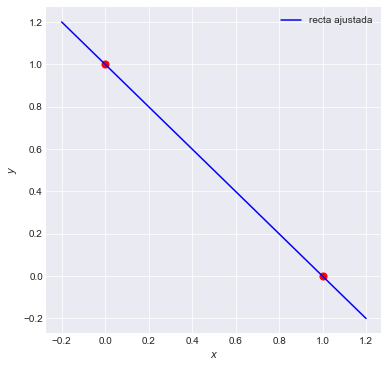

In [88]:
x = np.linspace(-0.2, 1.2, 100)
y = b1*x + b0

plt.figure(figsize=(6,6))
plt.scatter([0, 1], [1, 0], c = "r", s = 50);
plt.plot(x, y, 'b', label = 'recta ajustada')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(-1,1)$, obtenemos $\beta_2(-1)^2 + \beta_1(-1) + \beta_0 = 1$. Ahora, evaluando en el punto $(0,0)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 0$. Finalmente, evaluando en el punto $(1,1)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & -1 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 1 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=\beta_1=0$ y $\beta_2=1$.

In [89]:
P1 = [-1, 1]
P2 = [0, 0]
P3 = [1, 1]

X = np.array([[1, -1, 1], [1, 0, 0], [1, 1, 1]])
y = np.array([1, 0, 1])
b0, b1, b2 = np.linalg.inv(X).dot(y)
b0, b1, b2

(0.0, 0.0, 1.0)

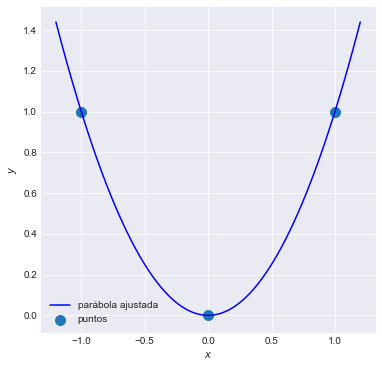

In [90]:
x = np.linspace(-1.2, 1.2, 100)
y = b2*x**2+b1*x+b0

plt.figure(figsize=(6,6))
plt.scatter([-1,0,1],[1,0,1], s = 100, label = 'puntos')
plt.plot(x, y, 'b', label = 'parábola ajustada')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de '*bonitos*' en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

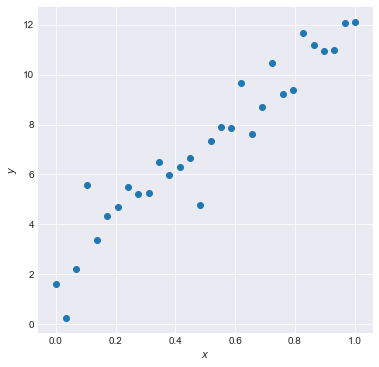

In [91]:
x = np.linspace(0, 1, 30)
y = 10*x + 2 + np.random.randn(30)

plt.figure(figsize=(6,6))
plt.scatter(x, y)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()

### ¿Cómo ajustamos una curva a esto?

##  Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $x_i$ ($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1\quad\dots\quad y_n\right]^T$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

Para llevar a cabo la anterior minimización, la librería `SciPy` en su módulo `optimize` contiene la función `minimize`.

In [92]:
import scipy.optimize as opt

In [93]:
def fun_obj1(b, x, y):
    return np.sum((y-b[0]-b[1]*x)**2)

In [94]:
b0 = np.array([1, 5])

In [95]:
res = opt.minimize(fun_obj1, b0, args = (x, y))
res

      fun: 25.55707087219393
 hess_inv: array([[ 0.06349395, -0.09349757],
       [-0.09349757,  0.18712519]])
      jac: array([-2.38418579e-06, -1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([ 2.14336038, 10.0760519 ])

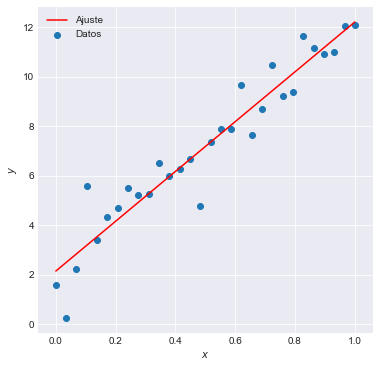

In [96]:
yhat = res.x[0]+res.x[1]*x

plt.figure(figsize=(6,6))
plt.scatter(x, y, label = 'Datos')
plt.plot(x, yhat, '-r', label = 'Ajuste')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()

### Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

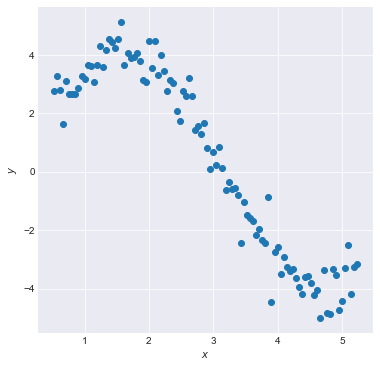

In [97]:
n = 100
x = np.linspace(np.pi/6, 5*np.pi/3, n)
y = 4*np.sin(x) + 0.5*np.random.randn(n)

plt.figure(figsize=(6,6))
plt.scatter(x, y)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()

#### Ajustando una línea recta ? 

In [98]:
def obj1(b, x, y):
    return np.sum((y-b[0]-b[1]*x)**2)

b0 = np.random.random((2,))

In [99]:
res = opt.minimize(obj1, b0, args=(x,y))
res

      fun: 159.81073608503618
 hess_inv: array([[ 0.0269637 , -0.00762684],
       [-0.00762684,  0.00264842]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([ 6.47814238, -2.12033795])

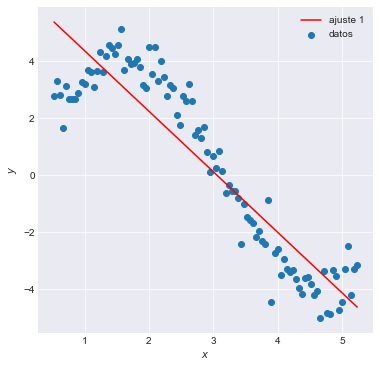

In [100]:
yhat1 = res.x[0]+res.x[1]*x

plt.figure(figsize=(6,6))
plt.scatter(x, y, label = 'datos')
plt.plot(x, yhat1, '-r', label = 'ajuste 1')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()

#### Ajustando una parábola?

In [101]:
def obj2(b, x, y):
    return np.sum((y-b[0]-b[1]*x-b[2]*x**2)**2)

b0 = np.random.random((3,))

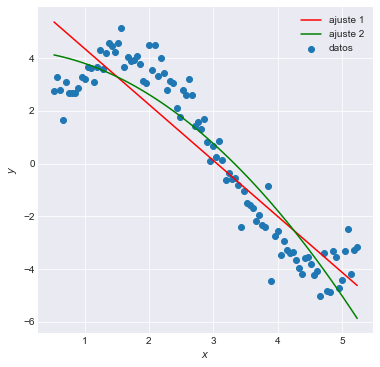

In [102]:
res = opt.minimize(obj2, b0, args=(x,y))
yhat2 = res.x[0]+res.x[1]*x+res.x[2]*x**2

plt.figure(figsize=(6,6))
plt.scatter(x, y, label = 'datos')
plt.plot(x, yhat1, '-r', label = 'ajuste 1')
plt.plot(x, yhat2, '-g', label = 'ajuste 2')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()

####  Quizá un polinomio cúbico...

In [103]:
def obj3(b, x, y):
    return np.sum((y-b[0]-b[1]*x-b[2]*x**2-b[3]*x**3)**2)

b0 = np.random.random((4,))

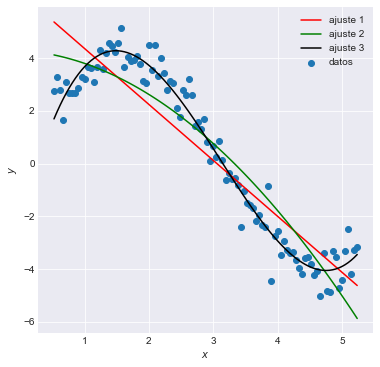

In [104]:
res = opt.minimize(obj3, b0, args=(x,y))
yhat3 = res.x[0]+res.x[1]*x+res.x[2]*x**2+res.x[3]*x**3

plt.figure(figsize=(6,6))
plt.scatter(x, y, label = 'datos')
plt.plot(x, yhat1, '-r', label = 'ajuste 1')
plt.plot(x, yhat2, '-g', label = 'ajuste 2')
plt.plot(x, yhat3, '-k', label = 'ajuste 3')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()

#### Entonces, ¿mientras más se suba el orden mejor la aproximación?

## <font color = red > ¡Cuidado! OVERFITTING... </font>

In [115]:
def obj7(b, x, y):
    return np.sum((y-np.array([x**i for i in range(8)]).T.dot(b))**2)

In [117]:
b0 = np.random.random((8,))
res = opt.minimize(obj7, b0, args=(x,y))
yhat7 = np.array([x**i for i in range(8)]).T.dot(res.x)


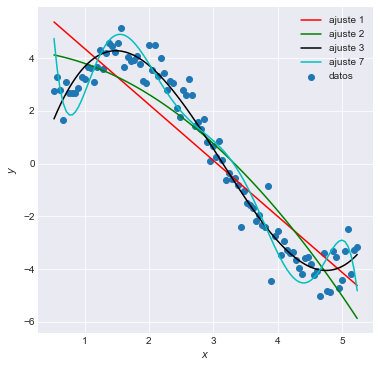

In [118]:
plt.figure(figsize=(6,6))
plt.scatter(x, y, label = 'datos')
plt.plot(x, yhat1, '-r', label = 'ajuste 1')
plt.plot(x, yhat2, '-g', label = 'ajuste 2')
plt.plot(x, yhat3, '-k', label = 'ajuste 3')
plt.plot(x, yhat7, '-c', label = 'ajuste 7')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()

#### Es conveniente ver el error como función del orden del polinomio... <font color = red> selección de modelos </font>

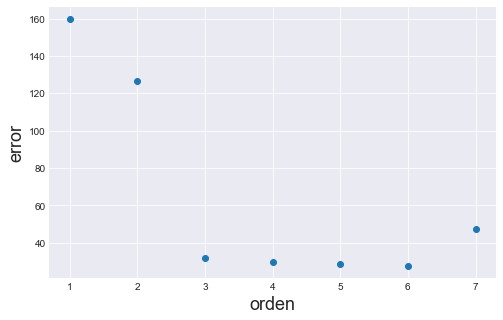

In [121]:
e_ms = []
def obj(b, x, y, n):
    return np.sum((y - np.array([x**i for i in range(n + 1)]).T.dot(b))**2)

for i in range(7):
    b0 = np.random.random((i + 2,))
    res = opt.minimize(obj, b0, args=(x,y,i + 1))
    yhat = np.array([x**j for j in range(i + 2)]).T.dot(res.x)
    e_ms.append(sum((y - yhat)**2))
    
plt.figure(figsize=(8,5))
plt.plot(np.arange(7) + 1, e_ms, 'o')
plt.xlabel('orden', fontsize = 18)
plt.ylabel('error', fontsize = 18)
plt.show()

### ¿Cómo prevenir el <font color = red > *overfitting* </font> sin importar el orden del modelo?

##  Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

-  [Ridge](Ridge.ipynb)
- [Lasso](Lasso.ipynb)
- [Ajuste robusto](Ajuste_robusto.ipynb)

___

###  Actividad

1. Ajustar polinomios de grado 1 hasta grado 7 a los siguientes datos.
2. Graficar el error cuadrático acumulado contra el número de términos, y elegir un polinomio que ajuste bien y su grado no sea muy alto.
4. Comparar los beta.

Abrir un nuevo notebook, llamado `ActividadClase6_nombreApellido`.

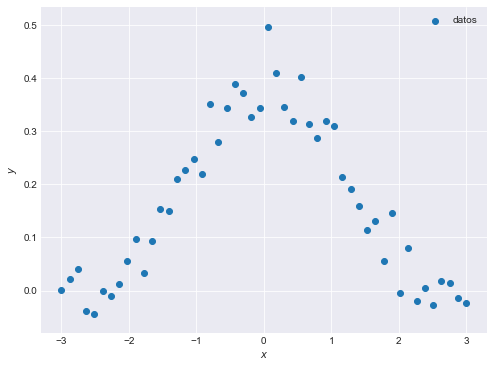

In [130]:
x = np.linspace(-3, 3)
y = f(x) + 0.04*np.random.randn(50)

plt.figure(figsize=(8,6))
plt.scatter(x, y, label = 'datos')
plt.legend(loc = 'best')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Lázaro Alonso.
 <Strong> Copyright: </Strong> Public Domain como en [CC](https://creativecommons.org/licenses/by/2.0/) (Exepto donde se indique lo contrario)


</footer>